# SST anomalies
Plot the SST anomalies for the Global Ocean.    
Prepared to work with MODIS-Terra SST 4 µm nightime data, at 9 km resolution, download from [Ocean Color](https://oceancolor.gsfc.nasa.gov/).

In [1]:
import sys
sys.path.insert(0, '..')
import os
import glob
import numpy as np
from filament import filament
import datetime
import cmocean
import logging
import netCDF4
import calendar
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from importlib import reload
reload(filament)

<module 'filament.filament' from '../filament/filament.py'>

## Logger

In [2]:
logger = logging.getLogger("SSTanom")
logger.setLevel(logging.INFO)
logging.info("Starting")

## Files and directories

In [43]:
year = 2015
sat = "TERRA"
sensor = "MODIS"
figdir = "/data/SST/Global/figures/"
monthlydir = "/data/SST/Global/monthly/{}".format(year)
climdir = "/data/SST/Global/monthly_clim/"

## Plot preparation
### Projection

In [40]:
sstmonthfile = filament.get_monthly_filename(sat, sensor, year, 1)
SSTmonth = filament.SST()
SSTmonth.read_from_oceancolorL3(os.path.join(monthlydir, sstmonthfile))

In [27]:
m = Basemap(projection='ortho',lon_0=-52.,lat_0=10,resolution='h')
llon, llat = np.meshgrid(SSTmonth.lon, SSTmonth.lat)
lonp, latp = m(llon, llat)
lonp[lonp==lonp.max()] = np.nan
latp[latp==latp.max()] = np.nan

### Plotting function

In [28]:
def make_monthly_subplot(m, lon, lat, SSTanom, month, NN=1, fgcolor="k", figtitle=None):
    
    if figtitle is not None:
        plt.title(figtitle, fontsize=18, color=fgcolor)
    m.drawcoastlines(linewidth=.2)
    pcm = m.pcolormesh(lon[::NN], lat[::NN], SSTanom[::NN],
                       cmap=plt.cm.RdBu_r, vmin=-2.5, vmax=2.5, zorder=2)
    m.fillcontinents(color='grey', zorder=3)
    #plt.colorbar(extend="both", shrink=.7)
    #m.warpimage("world.topo.bathy.200403.3x5400x2700.jpg", zorder=2)
    m.drawcoastlines(linewidth=.2, zorder=4, color="grey")
    #plt.savefig(os.path.join(figdir, "SST_anom_test"), dpi=300, bbox_inches="tight")
    # plt.show()
    #plt.close()
    return pcm

## Figure with the 12 months together

In [29]:
plt.close("all")
bgcolor = "black"
fgcolor = "white"

In [42]:
fig = plt.figure(figsize=(13, 10), facecolor=bgcolor)

for imonth in range(1, 13):
    if imonth == 1:
        yearstart = 2001
    else: 
        yearstart = 2000
    if imonth <= 5:
        yearend = 2020
    else:
        yearend = 2019
        
        
    sstclimfile = filament.get_monthly_clim_filename(sat, sensor, yearstart, yearend, imonth, res="9km")
    sstmonthfile = filament.get_monthly_filename(sat, sensor, year, imonth, res="9km")
    sstclimfile = os.path.join(climdir, sstclimfile)
    sstmonthfile = os.path.join(monthlydir, sstmonthfile)
    
    if os.path.exists(sstclimfile) & os.path.exists(sstmonthfile):
        logger.info("Working on month {}/12".format(imonth))
        # Read data (lon, lat and SST)
        SSTmonth = filament.SST()
        SSTmonth.read_from_oceancolorL3(sstmonthfile)
        SSTclim = filament.SST()
        SSTclim.read_from_oceancolorL3(sstclimfile)
    
        # Compute anomalies
        SSTanom = SSTmonth.field - SSTclim.field
        
        # Individual figures
        fig = plt.figure(figsize=(12, 12), facecolor=bgcolor)
        ax = plt.subplot(111)
        pcm = make_monthly_subplot(m, lonp, latp, SSTanom, imonth+1, NN=1, fgcolor=fgcolor)


        plt.savefig(os.path.join(figdir, "SSTanomalies_{}_{}".format(year, imonth)), 
                    facecolor=fig.get_facecolor(),
                    dpi=300, bbox_inches="tight")
        #plt.show()
        plt.close()

        """
        # Global figure
        ax = plt.subplot(3, 4, imonth)
        pcm = make_monthly_subplot(m, lonp, latp, SSTanom, imonth, NN=10, 
                                   fgcolor=fgcolor, figtitle=calendar.month_name[imonth])
        

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.92, 0.15, 0.03, 0.7])
normanom = mpl.colors.Normalize(vmin=-2.5, vmax=2.5)
cb1 = mpl.colorbar.ColorbarBase(cbar_ax, cmap=plt.cm.RdBu_r,
                                norm=normanom, orientation='vertical', 
                                extend="both")

cb1.set_label("$^{\circ}$C", rotation=0, ha="left", fontsize=18, 
              color=fgcolor, fontweight="bold")

cb1.ax.tick_params(axis='y', colors=fgcolor)


cb1_ytl = cb1.ax.get_yticklabels()
cb1.ax.set_yticklabels(cb1_ytl, color=fgcolor, 
                       fontweight="bold", fontsize=16)


fig.suptitle('Sea surface temperature anomalies $-$ {}'.format(year), 
             fontsize=24, color=fgcolor) 
plt.savefig(os.path.join(figdir, "SSTanomalies{}_test".format(year)), 
            facecolor=fig.get_facecolor(),
            dpi=300, bbox_inches="tight")
#plt.show()
plt.close()
"""

INFO:SSTanom:Working on month 1/12
INFO:SSTanom:Working on month 2/12
INFO:SSTanom:Working on month 3/12
INFO:SSTanom:Working on month 4/12
INFO:SSTanom:Working on month 5/12
INFO:SSTanom:Working on month 6/12
INFO:SSTanom:Working on month 8/12
INFO:SSTanom:Working on month 9/12
INFO:SSTanom:Working on month 10/12
INFO:SSTanom:Working on month 11/12
INFO:SSTanom:Working on month 12/12


### Plot the colorbar alone

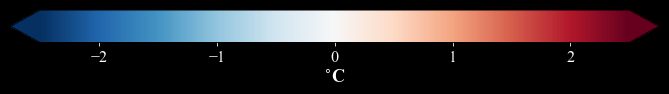

In [24]:
# Make a figure and axes with dimensions as desired.
fig = plt.figure(figsize=(10, 3), facecolor=bgcolor)
ax1 = fig.add_axes([0.05, 0.80, 0.9, 0.15])
cmap = mpl.cm.RdBu_r
normanom = mpl.colors.Normalize(vmin=-2.5, vmax=2.5)
cb1 = mpl.colorbar.ColorbarBase(ax1, cmap=cmap,
                                norm=normanom,
                                orientation='horizontal', extend="both")

cb1.set_label("$^{\circ}$C", fontsize=18, color=fgcolor, fontweight="bold")

cb1.ax.tick_params(axis='x', colors=fgcolor)
cb1_xtl = cb1.ax.get_xticklabels()
cb1.ax.set_xticklabels(cb1_xtl, color=fgcolor, 
                       fontsize=16)

plt.savefig(os.path.join(figdir, "sst_colorbar.png"), dpi=300, bbox_inches="tight",
            facecolor=fig.get_facecolor())
plt.show()

## Regional

In [39]:
coordinates = (-20, -10., 25., 32.)
m2 = Basemap(projection='merc', llcrnrlon=coordinates[0], llcrnrlat=coordinates[2],
            urcrnrlon=coordinates[1], urcrnrlat=coordinates[3],
            resolution='h')
sstmonthfile = filament.get_monthly_filename(sat, sensor, year, 1)
SSTmonth = filament.SST()
SSTmonth.read_from_oceancolorL3(os.path.join(monthlydir, sstmonthfile), domain=coordinates)
llon, llat = np.meshgrid(SSTmonth.lon, SSTmonth.lat)
lonp, latp = m2(llon, llat)
lonp[lonp==lonp.max()] = np.nan
latp[latp==latp.max()] = np.nan

INFO:SSTanom:Working on month 1/12
INFO:SSTanom:Working on month 2/12
INFO:SSTanom:Working on month 3/12
INFO:SSTanom:Working on month 4/12
INFO:SSTanom:Working on month 5/12
INFO:SSTanom:Working on month 6/12
INFO:SSTanom:Working on month 7/12
INFO:SSTanom:Working on month 8/12
INFO:SSTanom:Working on month 9/12
INFO:SSTanom:Working on month 10/12
INFO:SSTanom:Working on month 11/12
INFO:SSTanom:Working on month 12/12


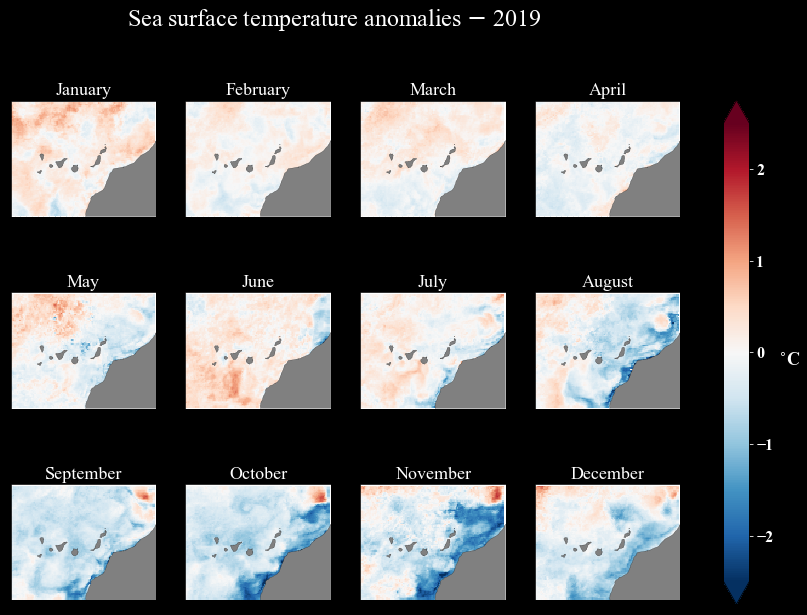

In [44]:
plt.close("all")
bgcolor = "black"
fgcolor = "white"

fig = plt.figure(figsize=(12, 10), facecolor=bgcolor)

for imonth in range(1, 13):
    if imonth == 1:
        yearstart = 2001
    else: 
        yearstart = 2000
    if imonth <= 5:
        yearend = 2020
    else:
        yearend = 2019
        
        
    sstclimfile = filament.get_monthly_clim_filename(sat, sensor, yearstart, yearend, imonth, res="9km")
    sstmonthfile = filament.get_monthly_filename(sat, sensor, year, imonth, res="9km")
    sstclimfile = os.path.join(climdir, sstclimfile)
    sstmonthfile = os.path.join(monthlydir, sstmonthfile)
    
    if os.path.exists(sstclimfile) & os.path.exists(sstmonthfile):
        logger.info("Working on month {}/12".format(imonth))
        # Read data (lon, lat and SST)
        SSTmonth = filament.SST()
        SSTmonth.read_from_oceancolorL3(sstmonthfile, domain=coordinates)
        SSTclim = filament.SST()
        SSTclim.read_from_oceancolorL3(sstclimfile, domain=coordinates)
    
        # Compute anomalies
        SSTanom = SSTmonth.field - SSTclim.field
        
        # Individual figure
        """
        fig = plt.figure(figsize=(12, 12), facecolor=bgcolor)
        ax = plt.subplot(111)
        pcm = make_monthly_subplot(m2, lonp, latp, SSTanom, imonth+1, NN=1, fgcolor=fgcolor)


        plt.savefig(os.path.join(figdir, "SSTanomalies_{}_{}".format(year, imonth)), 
                    facecolor=fig.get_facecolor(),
                    dpi=300, bbox_inches="tight")
        #plt.show()
        plt.close()
        """

        # Global figure
        ax = plt.subplot(3, 4, imonth)
        pcm = make_monthly_subplot(m2, lonp, latp, SSTanom, imonth, NN=1, 
                                   fgcolor=fgcolor, figtitle=calendar.month_name[imonth])
        

fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.95, 0.15, 0.03, 0.7])
normanom = mpl.colors.Normalize(vmin=-2.5, vmax=2.5)
cb1 = mpl.colorbar.ColorbarBase(cbar_ax, cmap=plt.cm.RdBu_r,
                                norm=normanom, orientation='vertical', 
                                extend="both")

cb1.set_label("$^{\circ}$C", rotation=0, ha="left", fontsize=18, 
              color=fgcolor, fontweight="bold")

cb1.ax.tick_params(axis='y', colors=fgcolor)


cb1_ytl = cb1.ax.get_yticklabels()
cb1.ax.set_yticklabels(cb1_ytl, color=fgcolor, 
                       fontweight="bold", fontsize=16)


fig.suptitle('Sea surface temperature anomalies $-$ {}'.format(year), 
             fontsize=24, color=fgcolor) 
plt.savefig(os.path.join(figdir, "Canary_SSTanomalies{}_".format(year)), 
            facecolor=fig.get_facecolor(),
            dpi=300, bbox_inches="tight")
plt.show()
plt.close()